In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем данные Титаника со строки 2 (пропускаем первую строку с числами)
df = pd.read_csv('../Titanic_Dataset.csv', skiprows=1)

# Переименовываем столбцы правильно
df.columns = ['sn', 'pclass', 'survived', 'name', 'gender', 'age', 'family', 'fare', 'embarked', 'date']

# Показываем первые строки
print("Первые 10 строк данных:")
print(df.head(10))
print("\nФорма датасета:", df.shape)
print("\nОписание столбцов:")
print(df.info())

ValueError: Length mismatch: Expected axis has 14 elements, new values have 10 elements

In [4]:
# АНАЛИЗ ВЫЖИВАНИЯ НА ТИТАНИКЕ

# 1. Общая статистика выживания
print("=" * 60)
print("ОБЩАЯ СТАТИСТИКА ВЫЖИВАНИЯ")
print("=" * 60)

survived_counts = df['survived'].value_counts().sort_index()
print("\nКоличество пассажиров:")
print(f"Выжили (1): {survived_counts[1]} человек")
print(f"Умерли (0): {survived_counts[0]} человек")
print(f"Всего: {len(df)} человек")

# Процентная статистика
survived_pct = df['survived'].value_counts(normalize=True).sort_index() * 100
print(f"\nПроцент выживших: {survived_pct[1]:.2f}%")
print(f"Процент умерших: {survived_pct[0]:.2f}%")

ОБЩАЯ СТАТИСТИКА ВЫЖИВАНИЯ


NameError: name 'df' is not defined

In [6]:
# 2. Анализ выживания по полу
print("\n" + "=" * 60)
print("АНАЛИЗ ВЫЖИВАНИЯ ПО ПОЛУ")
print("=" * 60)

gender_survival = pd.crosstab(df['gender'], df['survived'], margins=True)
print("\nКоличество пассажиров по полу и выживанию:")
print(gender_survival)

# Процент выживания по полу
print("\nПроцент выживания по полу:")
gender_survival_pct = pd.crosstab(df['gender'], df['survived'], normalize='index') * 100
print(gender_survival_pct.round(2))


АНАЛИЗ ВЫЖИВАНИЯ ПО ПОЛУ

Количество пассажиров по полу и выживанию:
survived    0    1   All
gender                  
female    126  339   465
male      674  161   835
All       800  500  1300

Процент выживания по полу:
survived      0      1
gender                
female    27.10  72.90
male      80.72  19.28


In [7]:
# 3. Анализ выживания по классу билета
print("\n" + "=" * 60)
print("АНАЛИЗ ВЫЖИВАНИЯ ПО КЛАССУ БИЛЕТА")
print("=" * 60)

class_survival = pd.crosstab(df['pclass'], df['survived'], margins=True)
print("\nКоличество пассажиров по классу и выживанию:")
print(class_survival)

# Процент выживания по классу
print("\nПроцент выживания по классу:")
class_survival_pct = pd.crosstab(df['pclass'], df['survived'], normalize='index') * 100
print(class_survival_pct.round(2))


АНАЛИЗ ВЫЖИВАНИЯ ПО КЛАССУ БИЛЕТА

Количество пассажиров по классу и выживанию:
survived    0    1   All
pclass                  
1         123  200   323
2         159  119   278
3         519  181   700
All       801  500  1301

Процент выживания по классу:
survived      0      1
pclass                
1         38.08  61.92
2         57.19  42.81
3         74.14  25.86


In [8]:
# 4. Комбинированный анализ по полу И классу
print("\n" + "=" * 60)
print("АНАЛИЗ ВЫЖИВАНИЯ ПО ПОЛУ И КЛАССУ")
print("=" * 60)

gender_class_survival = pd.crosstab([df['gender'], df['pclass']], df['survived'])
print("\nКоличество пассажиров по полу, классу и выживанию:")
print(gender_class_survival)


АНАЛИЗ ВЫЖИВАНИЯ ПО ПОЛУ И КЛАССУ

Количество пассажиров по полу, классу и выживанию:
survived         0    1
gender pclass          
female 1         5  139
       2        12   94
       3       109  106
male   1       118   61
       2       146   25
       3       410   75


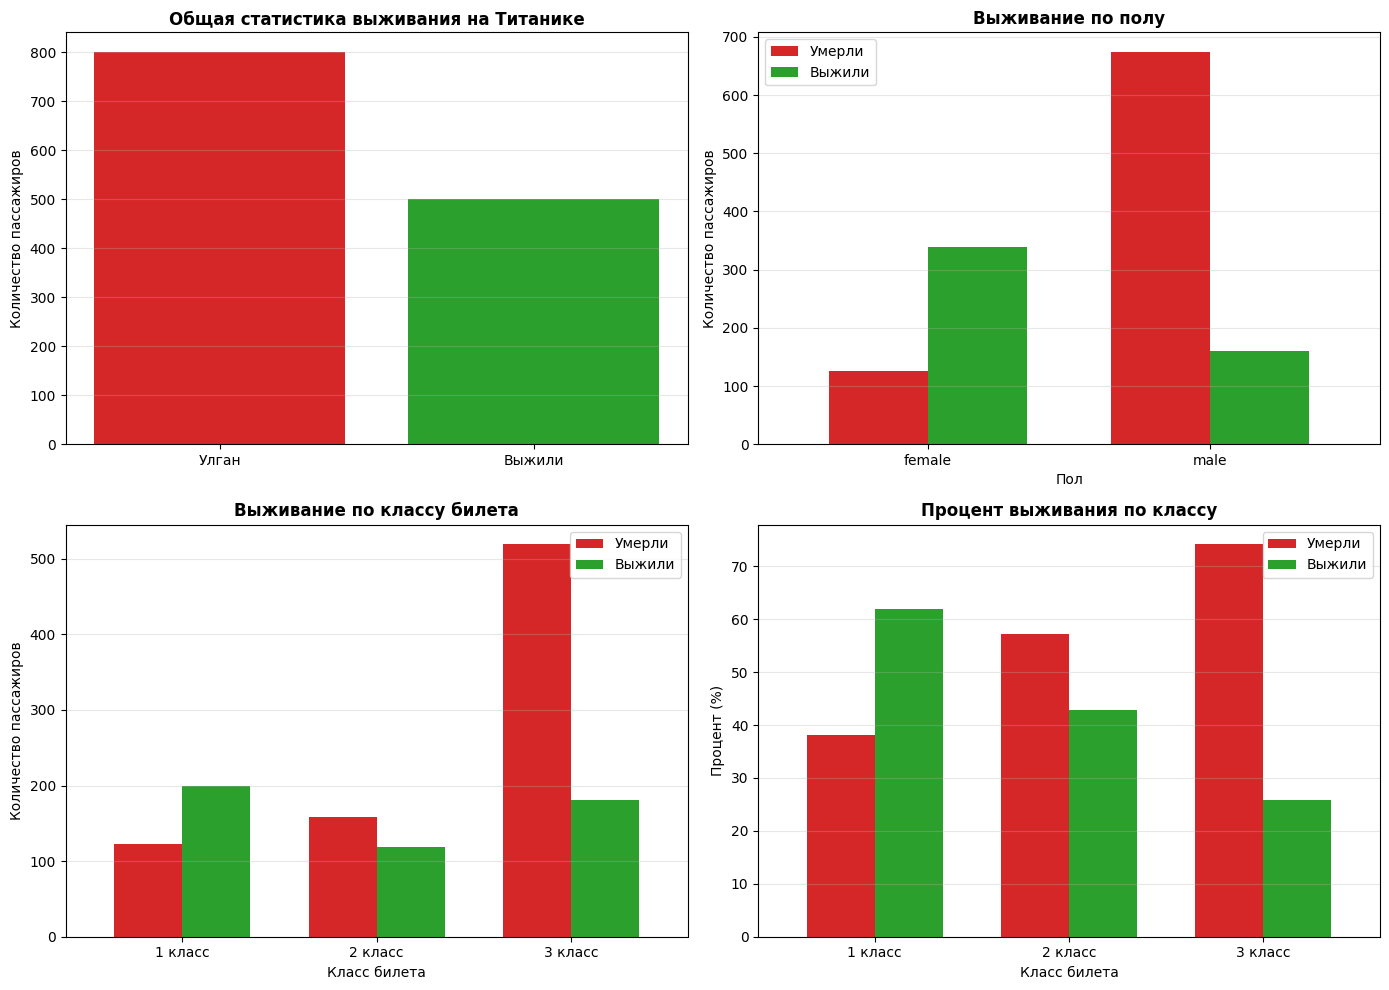


Графики визуализации созданы!


In [9]:
# 5. Визуализация результатов
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# График 1: Общее распределение выживания
ax1 = axes[0, 0]
survived_labels = ['Улган', 'Выжили']
survived_counts_list = [df[df['survived'] == 0].shape[0], df[df['survived'] == 1].shape[0]]
colors = ['#d62728', '#2ca02c']
ax1.bar(survived_labels, survived_counts_list, color=colors)
ax1.set_ylabel('Количество пассажиров')
ax1.set_title('Общая статистика выживания на Титанике', fontsize=12, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# График 2: Выживание по полу
ax2 = axes[0, 1]
gender_data = pd.crosstab(df['gender'], df['survived'])
gender_data.plot(kind='bar', ax=ax2, color=colors, width=0.7)
ax2.set_title('Выживание по полу', fontsize=12, fontweight='bold')
ax2.set_ylabel('Количество пассажиров')
ax2.set_xlabel('Пол')
ax2.legend(['Умерли', 'Выжили'], loc='upper left')
ax2.grid(axis='y', alpha=0.3)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)

# График 3: Выживание по классу
ax3 = axes[1, 0]
class_data = pd.crosstab(df['pclass'], df['survived'])
class_data.plot(kind='bar', ax=ax3, color=colors, width=0.7)
ax3.set_title('Выживание по классу билета', fontsize=12, fontweight='bold')
ax3.set_ylabel('Количество пассажиров')
ax3.set_xlabel('Класс билета')
ax3.legend(['Умерли', 'Выжили'], loc='upper right')
ax3.grid(axis='y', alpha=0.3)
ax3.set_xticklabels(['1 класс', '2 класс', '3 класс'], rotation=0)

# График 4: Процент выживания по классу
ax4 = axes[1, 1]
class_pct = pd.crosstab(df['pclass'], df['survived'], normalize='index') * 100
class_pct.plot(kind='bar', ax=ax4, color=colors, width=0.7)
ax4.set_title('Процент выживания по классу', fontsize=12, fontweight='bold')
ax4.set_ylabel('Процент (%)')
ax4.set_xlabel('Класс билета')
ax4.legend(['Умерли', 'Выжили'], loc='upper right')
ax4.grid(axis='y', alpha=0.3)
ax4.set_xticklabels(['1 класс', '2 класс', '3 класс'], rotation=0)

plt.tight_layout()
plt.show()

print("\nГрафики визуализации созданы!")
